***************************
Data cleaning case study
***************************

:Authors: Galvanize DS
:Web site: https://github.com/gSchool/ds-case-study-data-cleaning


Pipline accident data set
-----------------------------------------------

The data are a kaggle data set that was released by the USDOT.

   https://www.kaggle.com/usdot/pipeline-accidents

The `pipeline-accidents.csv` includes a record for each oil pipeline
leak or spill reported to the Pipeline and Hazardous Materials Safety
Administration since 2010. These records include the incident date and
time, operator and pipeline, cause of incident, type of hazardous
liquid and quantity lost, injuries and fatalities, and associated
costs.

   Because these data are in the public domain we ask that your group
   does not use code from any published analyses.  There are
   publically available Jupyter notebooks and more, but please treat
   this as a learning experience.  How far can you get with your
   group's investigative ability?

The goal of this exercise is to take the concepts, tools and
technologies that you have learned up until this point and apply them.
There are not specific objectives except that you will have to present
a summary of your findings at the end of the day.

Coming up with your strategy
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

However you decide to tackle this analysis you will want to
spend some time coming up with a strategy.

  1. You could focus on comparing a subset of states/years/months
  2. You could come up with a series of summary tables
  3. You could investigate a subset of accidents (e.g. the most expensive)  
  4. You could try to implement a systematic approach for outlier detection
  5. There are missing values in these data you could compare some different strategies for imputation

Even when you are a seasoned data scientist you will need more than
half of a day to tackle all of these so scope here is important.
     
Some of the tools that may come in useful here are: correlation
coefficients, groupbys, pivot tables, simple plots from dataframes.

Just in case you are interested in anything time related here are a
couple of lines of code to get you started.

.. code:: python

   df['Date'] = df['Accident Date/Time'].apply(lambda x: (re.split("\s",str(x))[0]))
   df['Month'] = df['Date'].apply(lambda x: (re.split("/",str(x))[0]))
   df['Day'] = df['Date'].apply(lambda x: (re.split("/",str(x))[1]))
   df['Year'] = df['Date'].apply(lambda x: (re.split("/",str(x))[2]))


Deliverable
--------------

At the end of the day your group will be expected to present for 5
minutes on your findings.  You can do this directly from your Jupyter
notebooks.

Cover the following in your presentation.

   1. Talk about what you planned to accomplish
   2. How you organized your selves as a team
   3. What you accomplished
   4. Anything new you learned along the way

In [130]:
import pandas as pd
import numpy as np
import seaborn as sns 


# Code to get ours to function correctly. Pandas plotting is built on top of matplotlib, so 
# we have to import it. 
import matplotlib.pyplot as plt
# This just tells the IPython notebook to plot it inline (i.e. in the browser).
%matplotlib inline
# This will change the style that matplotlib uses (i.e. makes the plots look nicer than the default)
import matplotlib
matplotlib.style.use('ggplot')

df = pd.read_csv('pipeline-accidents.csv', delimiter = ',')

In [131]:
df ['total_release'] = df['Liquid Recovery (Barrels)'] + df['Net Loss (Barrels)']
df ['perc_recovered'] = df['Liquid Recovery (Barrels)'] / df['total_release']


In [132]:
df['Cause Category']

0               INCORRECT OPERATION
1       MATERIAL/WELD/EQUIP FAILURE
2       MATERIAL/WELD/EQUIP FAILURE
3              NATURAL FORCE DAMAGE
4                 EXCAVATION DAMAGE
5       MATERIAL/WELD/EQUIP FAILURE
6       MATERIAL/WELD/EQUIP FAILURE
7              NATURAL FORCE DAMAGE
8       MATERIAL/WELD/EQUIP FAILURE
9                  ALL OTHER CAUSES
10             NATURAL FORCE DAMAGE
11      MATERIAL/WELD/EQUIP FAILURE
12                        CORROSION
13             NATURAL FORCE DAMAGE
14                        CORROSION
15              INCORRECT OPERATION
16      MATERIAL/WELD/EQUIP FAILURE
17             NATURAL FORCE DAMAGE
18      MATERIAL/WELD/EQUIP FAILURE
19              INCORRECT OPERATION
20             NATURAL FORCE DAMAGE
21       OTHER OUTSIDE FORCE DAMAGE
22                        CORROSION
23      MATERIAL/WELD/EQUIP FAILURE
24      MATERIAL/WELD/EQUIP FAILURE
25      MATERIAL/WELD/EQUIP FAILURE
26      MATERIAL/WELD/EQUIP FAILURE
27             NATURAL FORCE

In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2795 entries, 0 to 2794
Data columns (total 50 columns):
Report Number                           2795 non-null int64
Supplemental Number                     2795 non-null int64
Accident Year                           2795 non-null int64
Accident Date/Time                      2795 non-null object
Operator ID                             2795 non-null int64
Operator Name                           2795 non-null object
Pipeline/Facility Name                  2674 non-null object
Pipeline Location                       2795 non-null object
Pipeline Type                           2777 non-null object
Liquid Type                             2795 non-null object
Liquid Subtype                          1349 non-null object
Liquid Name                             222 non-null object
Accident City                           2480 non-null object
Accident County                         2720 non-null object
Accident State                          2783

In [134]:
df.describe()

,Report Number,Supplemental Number,Accident Year,Operator ID,Accident Latitude,Accident Longitude,Unintentional Release (Barrels),Intentional Release (Barrels),Liquid Recovery (Barrels),Net Loss (Barrels),...,All Fatalities,Property Damage Costs,Lost Commodity Costs,Public/Private Property Damage Costs,Emergency Response Costs,Environmental Remediation Costs,Other Costs,All Costs,total_release,perc_recovered
count,2.795000e+03,2795.000000,2795.000000,2795.000000,2795.000000,2795.000000,2795.000000,1209.000000,2795.000000,2795.000000,...,8.00000,2.788000e+03,2.791000e+03,2.785000e+03,2.789000e+03,2.787000e+03,2.779000e+03,2.795000e+03,2795.000000,2765.000000
mean,2.013293e+07,19433.319499,2013.187835,21388.476565,35.781608,-95.682691,207.245843,238.533623,75.051792,132.194050,...,1.25000,1.122963e+05,9.805299e+03,2.512195e+04,2.918911e+05,3.628094e+05,3.435604e+04,8.340332e+05,207.245843,0.667696
std,1.982098e+04,1724.815370,1.972102,12430.973428,5.652599,12.328430,1368.667813,2781.771453,546.188247,1185.019252,...,0.46291,8.709947e+05,6.384075e+04,5.243581e+05,4.617076e+06,1.206887e+07,6.191235e+05,1.657830e+07,1368.667813,0.435154
min,2.010000e+07,15072.000000,2010.000000,300.000000,18.448010,-158.099930,0.000000,0.000000,0.000000,0.000000,...,1.00000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,2.012004e+07,17978.500000,2012.000000,11169.000000,30.909375,-100.587636,0.480000,0.000000,0.000000,0.000000,...,1.00000,1.000000e+02,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.039500e+03,0.480000,0.000000
50%,2.013037e+07,19502.000000,2013.000000,26041.000000,34.925440,-95.488870,2.000000,0.000000,0.740000,0.000000,...,1.00000,3.000000e+03,1.000000e+02,0.000000e+00,2.520000e+03,8.000000e+02,0.000000e+00,2.312900e+04,2.000000,1.000000
75%,2.015023e+07,20996.500000,2015.000000,31618.000000,40.264062,-91.089463,20.000000,0.000000,8.000000,2.000000,...,1.25000,2.500000e+04,7.000000e+02,0.000000e+00,1.550000e+04,1.500000e+04,0.000000e+00,1.172325e+05,20.000000,1.000000
max,2.017003e+07,22049.000000,2017.000000,99043.000000,70.261265,104.263399,30565.000000,70191.000000,18245.000000,30565.000000,...,2.00000,2.700000e+07,1.417839e+06,2.300000e+07,1.770000e+08,6.350000e+08,2.235000e+07,8.405261e+08,30565.000000,1.000000


In [135]:
#creating new data frame to only look at the top 5 by incident count

iso_df = df[(df['Accident State'] == 'TX') | (df['Accident State'] == 'OK')|(df['Accident State'] == 'LA')|(df['Accident State'] == 'CA')|(df['Accident State'] == 'KS')]
iso_df = iso_df[iso_df['Accident Year'] != 2017]

iso_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1711 entries, 0 to 2792
Data columns (total 50 columns):
Report Number                           1711 non-null int64
Supplemental Number                     1711 non-null int64
Accident Year                           1711 non-null int64
Accident Date/Time                      1711 non-null object
Operator ID                             1711 non-null int64
Operator Name                           1711 non-null object
Pipeline/Facility Name                  1639 non-null object
Pipeline Location                       1711 non-null object
Pipeline Type                           1705 non-null object
Liquid Type                             1711 non-null object
Liquid Subtype                          715 non-null object
Liquid Name                             160 non-null object
Accident City                           1528 non-null object
Accident County                         1676 non-null object
Accident State                          1711 

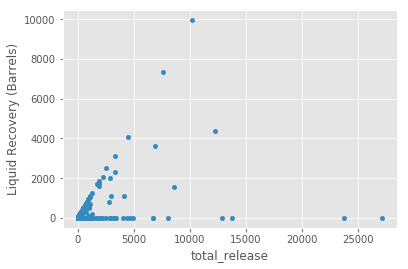

In [136]:
#scatter relations

iso_df.plot(kind = "scatter", x = 'total_release', y = 'Liquid Recovery (Barrels)')

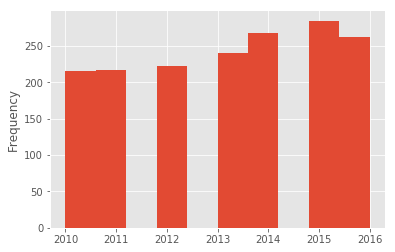

In [137]:
#number of incidents per year

iso_df['Accident Year'].plot(kind = 'hist')
#iso_df.groupby('Accident State').mean().plot(kind='bar')

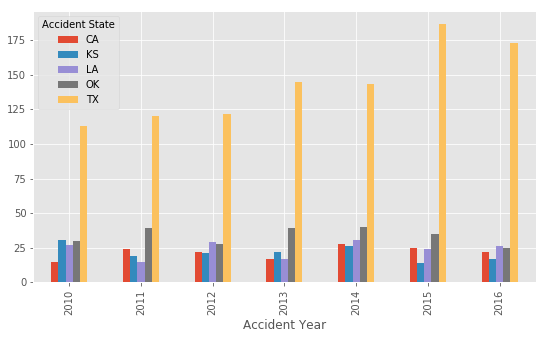

In [138]:
#iso_df.groupby('Accident State').plot(kind = 'bar', x = 'Accident Year', y = iso_df.count('Accident Year'))
#iso_df.groupby(['Accident State']).count().plot(kind='bar')
#df.groupby([df.index.date, 'action']).count().plot(kind='bar')



#years = pd.pivot_table(iso_df, values = 'Net Loss (Barrels)', aggfunc = 'sum', index = 'Accident Year', columns = 'Accident State')
#years.plot(kind='barh', figsize=(9,5), xlim = (0,25000))


# number of incidents per year per state

year = pd.pivot_table(iso_df, values = 'Report Number', columns = 'Accident State', index = 'Accident Year', aggfunc = 'count')
year.plot(kind='bar', figsize=(9,5))

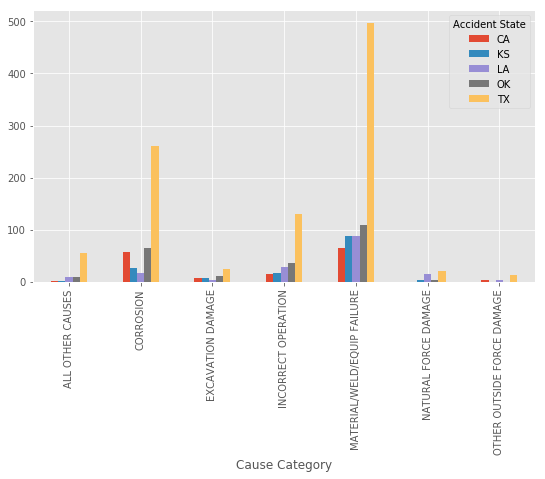

In [139]:
# number of incidents by cause category by state
year = pd.pivot_table(iso_df, values = 'Report Number', columns = 'Accident State', index = 'Cause Category', aggfunc = 'count')
year.plot(kind='bar', figsize=(9,5))

In [140]:
#Sorted mean total release (decending) by operator
iso_df.groupby('Operator Name').mean().sort_values('total_release',ascending = False)

,Report Number,Supplemental Number,Accident Year,Operator ID,Accident Latitude,Accident Longitude,Unintentional Release (Barrels),Intentional Release (Barrels),Liquid Recovery (Barrels),Net Loss (Barrels),...,All Fatalities,Property Damage Costs,Lost Commodity Costs,Public/Private Property Damage Costs,Emergency Response Costs,Environmental Remediation Costs,Other Costs,All Costs,total_release,perc_recovered
Operator Name,,,,,,,,,,,,,,,,,,,,,
CHEVRON MIDSTREAM PIPELINES LLC,2.012527e+07,18278.750000,2012.500000,31556.0,29.843961,-90.509747,5927.300000,265.252500,0.000000,5927.300000,...,1.0,1.291634e+06,244577.750000,0.000000,1.175160e+06,0.000000e+00,0.000000,2.711371e+06,5927.300000,0.000000
TARGA RESOURCES OPERATING LP,2.010015e+07,15205.000000,2010.000000,32296.0,30.259890,-93.209910,2237.000000,25.000000,0.000000,2237.000000,...,NaN,2.936000e+04,136233.000000,NaN,NaN,NaN,NaN,1.655930e+05,2237.000000,0.000000
DIXIE PIPELINE COMPANY LLC,2.014680e+07,20231.666667,2014.666667,3445.0,30.364680,-92.598677,1651.500000,0.000000,0.000000,1651.500000,...,NaN,1.667333e+05,27373.000000,666.666667,1.666667e+03,1.666667e+03,0.000000,1.981063e+05,1651.500000,0.000000
CENTURION PIPELINE L.P.,2.013658e+07,20876.000000,2013.454545,31888.0,33.348722,-101.212047,1455.636364,0.000000,1270.000000,185.636364,...,NaN,1.869991e+04,16100.000000,2181.818182,4.696191e+04,6.696336e+04,16907.181818,1.678142e+05,1455.636364,0.594940
TRANSMONTAIGNE OPERATING COMPANY L.P.,2.011044e+07,18195.000000,2011.000000,30909.0,25.964238,-97.381096,1330.000000,0.000000,0.000000,1330.000000,...,NaN,0.000000e+00,87130.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,8.713000e+04,1330.000000,0.000000
CHEMOIL TERMINALS CORP.,2.014024e+07,19607.000000,2014.000000,879.0,33.806917,-118.227056,989.000000,NaN,600.000000,389.000000,...,NaN,0.000000e+00,49014.000000,0.000000,1.509860e+05,0.000000e+00,0.000000,2.000000e+05,989.000000,0.606673
VALERO REFINING-TEXAS L.P.,2.015026e+07,20595.000000,2015.000000,26112.0,29.706862,-95.249419,976.000000,0.000000,0.000000,976.000000,...,1.0,6.200000e+04,688000.000000,0.000000,0.000000e+00,0.000000e+00,26753.000000,7.767530e+05,976.000000,0.000000
"NUSTAR LOGISTICS, L.P.",2.013644e+07,19704.000000,2013.615385,31454.0,30.416466,-98.202858,932.331538,0.000000,70.692308,861.639231,...,NaN,1.012146e+05,37005.615385,90453.846154,8.474715e+04,6.907723e+04,1993.461538,3.844919e+05,932.331538,0.512438
CHEVRON PIPE LINE CO,2.011231e+07,17237.625000,2011.208333,2731.0,31.903976,-101.455729,894.430417,263.526316,32.380000,862.050417,...,NaN,2.953565e+05,68531.791667,22708.333333,4.779458e+05,1.547917e+05,25154.166667,1.044488e+06,894.430417,0.393615


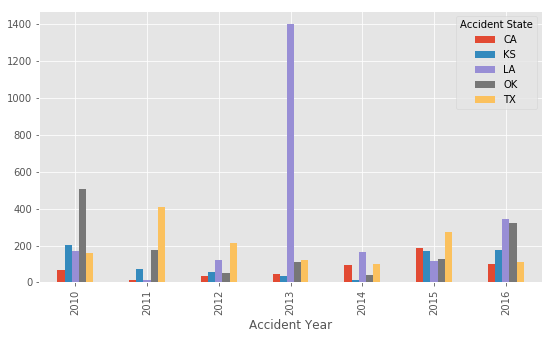

In [141]:
#average total release by year
year = pd.pivot_table(iso_df, values = 'total_release', columns = 'Accident State', index = 'Accident Year', aggfunc = 'mean')
year.plot(kind='bar', figsize=(9,5))


In [142]:
iso_df.head()

,Report Number,Supplemental Number,Accident Year,Accident Date/Time,Operator ID,Operator Name,Pipeline/Facility Name,Pipeline Location,Pipeline Type,Liquid Type,...,All Fatalities,Property Damage Costs,Lost Commodity Costs,Public/Private Property Damage Costs,Emergency Response Costs,Environmental Remediation Costs,Other Costs,All Costs,total_release,perc_recovered
0,20100016,17305,2010,1/1/2010 7:15 AM,32109,ONEOK NGL PIPELINE LP,KINDER MORGAN JCT,ONSHORE,ABOVEGROUND,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",...,NaN,110.0,1517.0,0.0,0.0,0.0,0.0,1627,21.00,0.000000
2,20100038,17747,2010,1/5/2010 10:30 AM,20160,"PETROLOGISTICS OLEFINS, LLC",NaN,ONSHORE,ABOVEGROUND,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",...,NaN,0.0,200.0,0.0,0.0,0.0,0.0,200,2.00,0.000000
4,20100030,16276,2010,1/7/2010 1:00 PM,300,"PLAINS PIPELINE, L.P.",RED RIVER EAST,ONSHORE,UNDERGROUND,CRUDE OIL,...,NaN,20000.0,150.0,0.0,7500.0,2000.0,0.0,29650,700.00,0.997143
6,20110036,18052,2010,1/9/2010 12:15 AM,26041,"KINDER MORGAN LIQUID TERMINALS, LLC",NaN,ONSHORE,TANK,"REFINED AND/OR PETROLEUM PRODUCT (NON-HVL), LI...",...,NaN,0.0,400.0,0.0,0.0,70000.0,0.0,70400,35.00,0.857143
7,20100255,18584,2010,1/9/2010 1:12 AM,12624,MOBIL CORP,HULL STATION,ONSHORE,ABOVEGROUND,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",...,NaN,400.0,13.0,0.0,0.0,0.0,0.0,413,0.24,0.000000


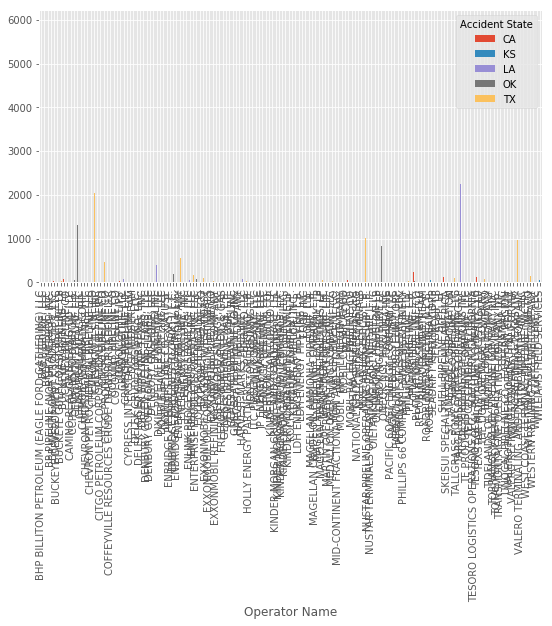

In [143]:
#mean total release by Operator
year = pd.pivot_table(iso_df, values = 'total_release', columns = 'Accident State', index = 'Operator Name', aggfunc = 'mean')
year.plot(kind='bar', figsize=(9,5))

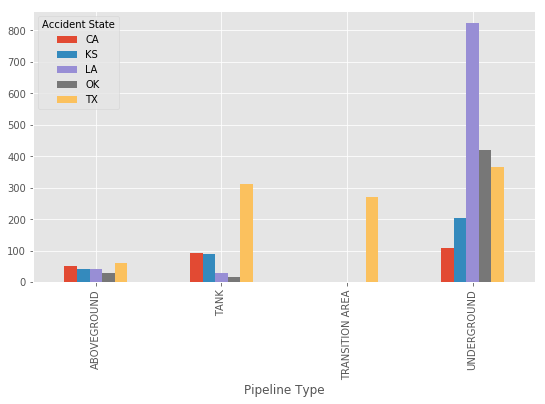

In [144]:
#average spill volume per pipeline type
year = pd.pivot_table(iso_df, values = 'total_release', columns = 'Accident State', index = 'Pipeline Type', aggfunc = 'mean')
year.plot(kind='bar', figsize=(9,5))

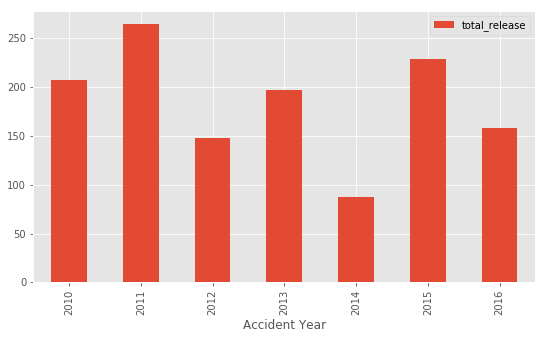

In [151]:
# average spill size over time
year = pd.pivot_table(iso_df, values = 'total_release', index = 'Accident Year', aggfunc = 'mean')
year.plot(kind='bar', figsize=(9,5))

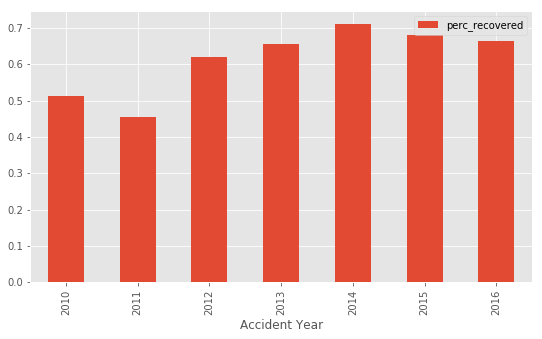

In [150]:
# % recovered over time --- this could be improved by summing the total recovered volume / summing the total spill volume
year = pd.pivot_table(iso_df, values = 'perc_recovered', index = 'Accident Year', aggfunc = 'mean')
year.plot(kind='bar', figsize=(9,5))

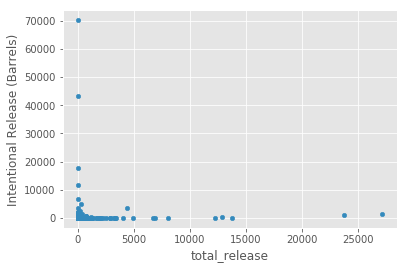

In [153]:
#release type, intentional / unintentional
iso_df.plot(kind = "scatter", x = 'total_release', y = 'Intentional Release (Barrels)')